In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', title='02-Chunk5', logger=display)
analysis.load_data()

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'actual_mean_temp'
features = [predictor]
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1827.791, BIC=1846.175, Fit time=1.850 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1962.638, BIC=1977.345, Fit time=0.495 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1864.170, BIC=1878.877, Fit time=1.054 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1829.085, BIC=1851.146, Fit time=2.014 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1986.101, BIC=2000.808, Fit time=0.606 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1831.230, BIC=1856.967, Fit time=5.801 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1811.604, BIC=1833.664, Fit time=2.212 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 

'Train Error: 5.07417608657  Num NaN: 0'

'Test Error: 6.38998095112    Num NaN: 0'

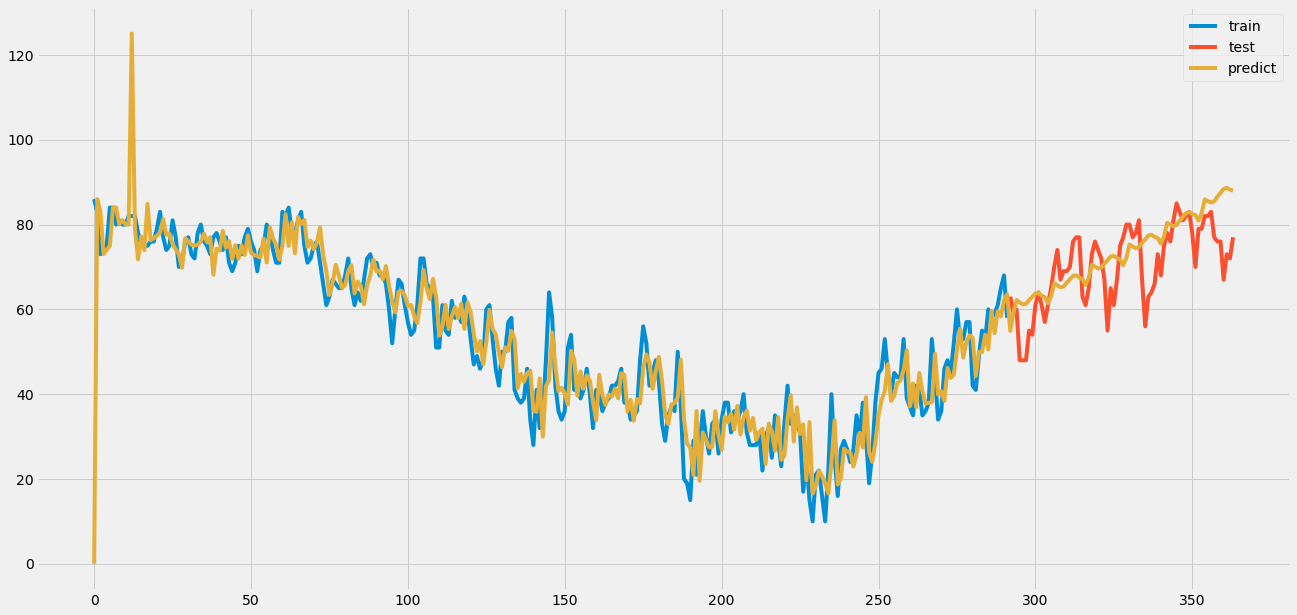

In [4]:
model = ARIMA(analysis, use_features=False)
analysis.run_model(model, name='ARIMA')

'Train Error: 4.50479452055  Num NaN: 0'

'Test Error: 4.60555555556    Num NaN: 0'

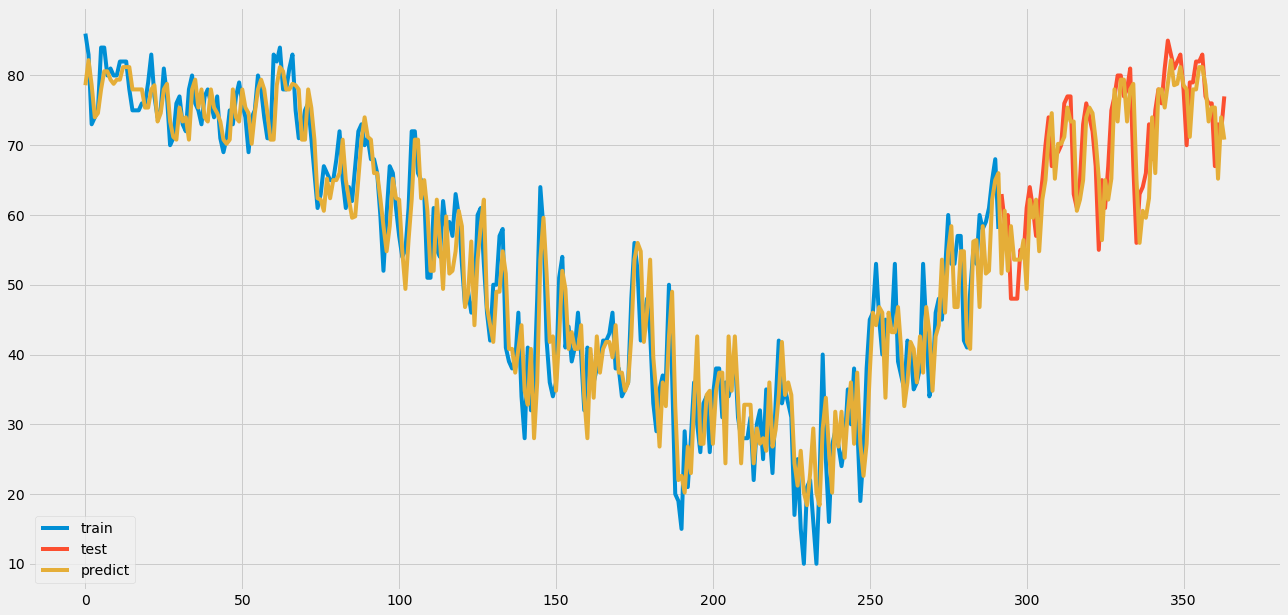

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model, name='KNN')

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 3.517846235e+12  Num NaN: 0'

'Test Error: 4.70313205946e+12    Num NaN: 0'

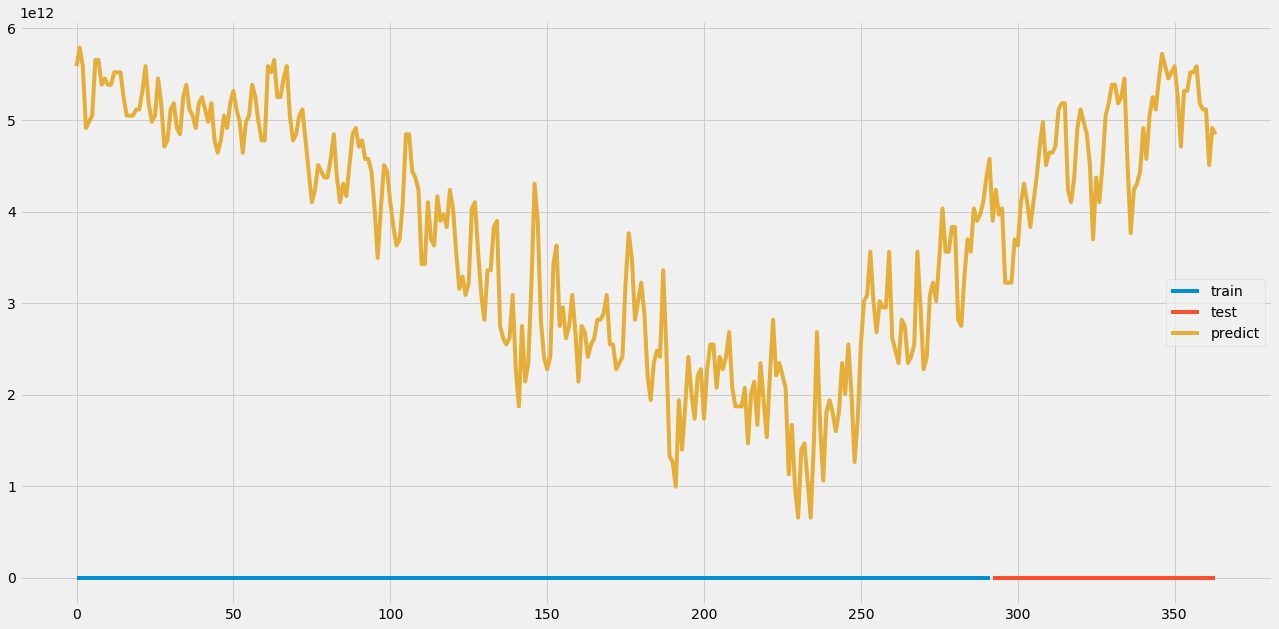

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error: 4.30414427943  Num NaN: 0'

'Test Error: 4.4784505348    Num NaN: 0'

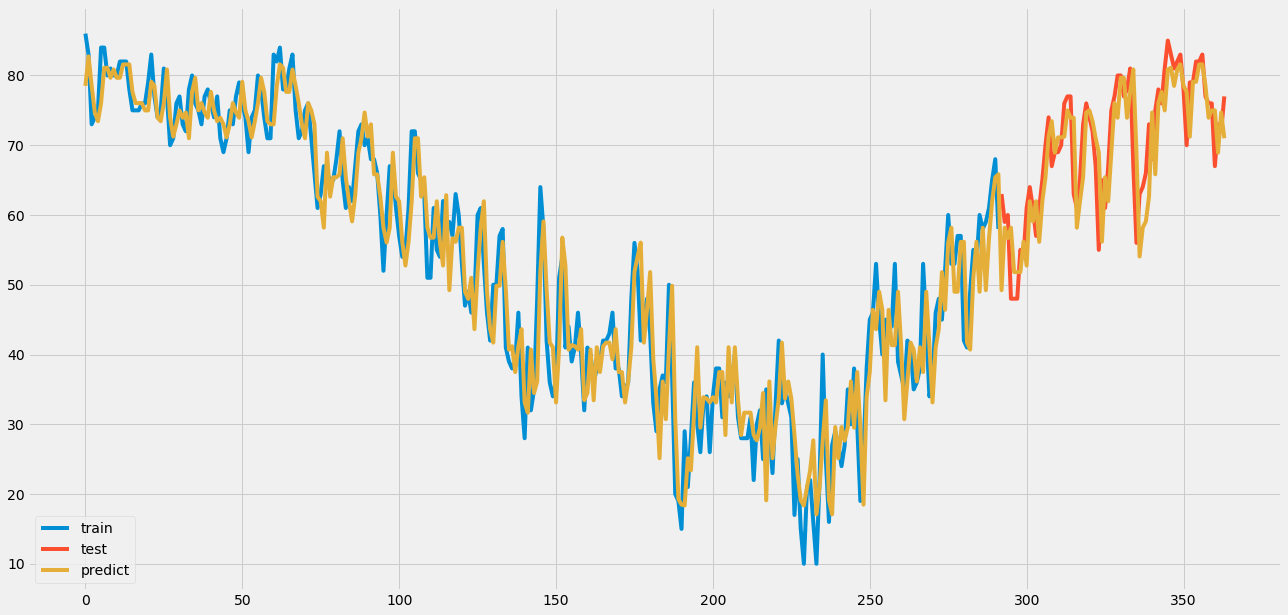

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error: 4.67486159101  Num NaN: 0'

'Test Error: 4.74500611335    Num NaN: 0'

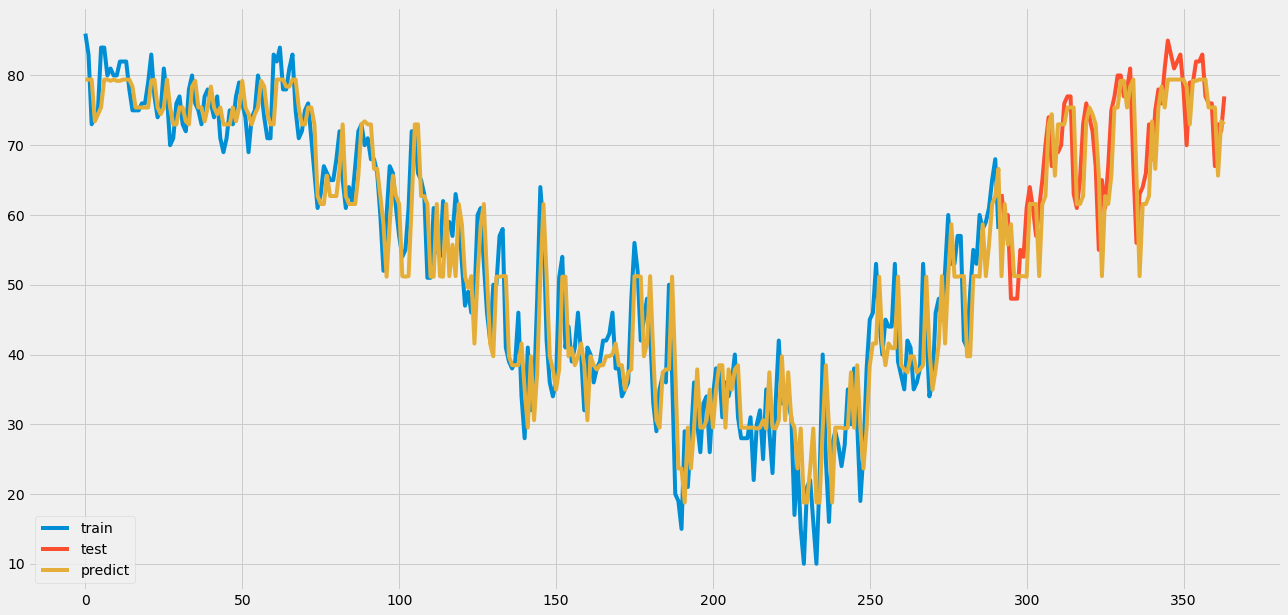

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error: 4.26186738031  Num NaN: 0'

'Test Error: 4.49174492061    Num NaN: 0'

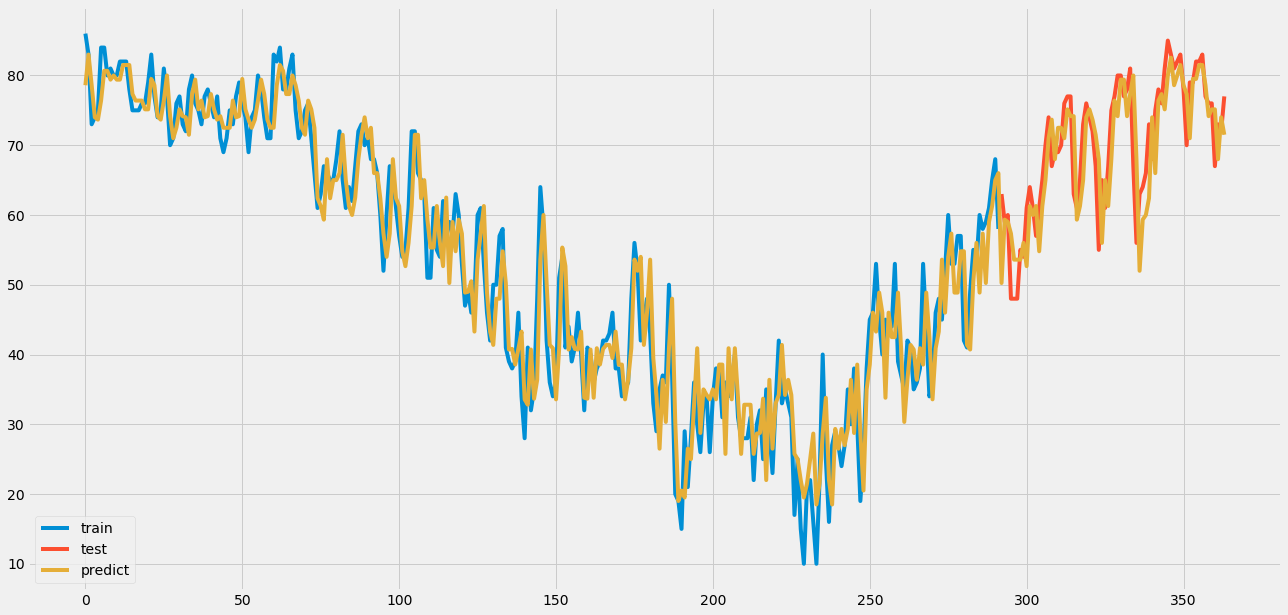

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error: 5.70952644694  Num NaN: 5'

'Test Error: 6.19872245938    Num NaN: 5'

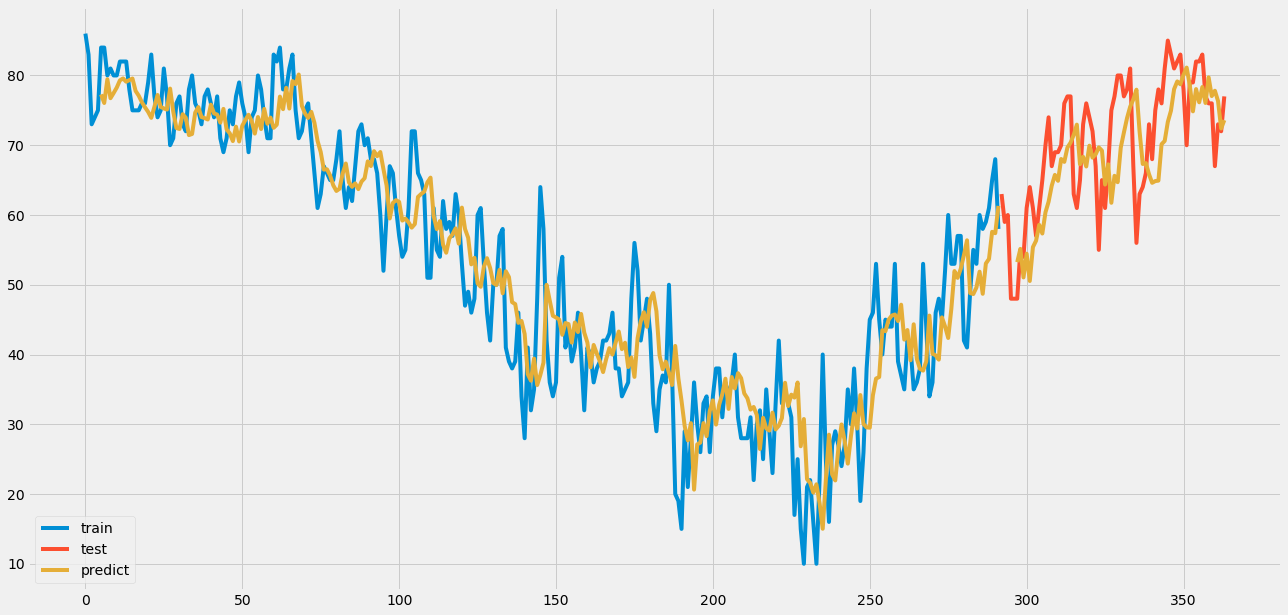

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

Using TensorFlow backend.


Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.2666 - val_loss: 0.1103
Epoch 2/10
 - 0s - loss: 0.2289 - val_loss: 0.2106
Epoch 3/10
 - 0s - loss: 0.2200 - val_loss: 0.1933
Epoch 4/10
 - 0s - loss: 0.2080 - val_loss: 0.2625
Epoch 5/10
 - 0s - loss: 0.2062 - val_loss: 0.1646
Epoch 6/10
 - 0s - loss: 0.2079 - val_loss: 0.1518
Epoch 7/10
 - 0s - loss: 0.1963 - val_loss: 0.1992
Epoch 8/10
 - 0s - loss: 0.2101 - val_loss: 0.1747
Epoch 9/10
 - 0s - loss: 0.2051 - val_loss: 0.2143
Epoch 10/10
 - 0s - loss: 0.2021 - val_loss: 0.3471


'Train Error: 17.9071096809  Num NaN: 5'

'Test Error: 26.0291010302    Num NaN: 5'

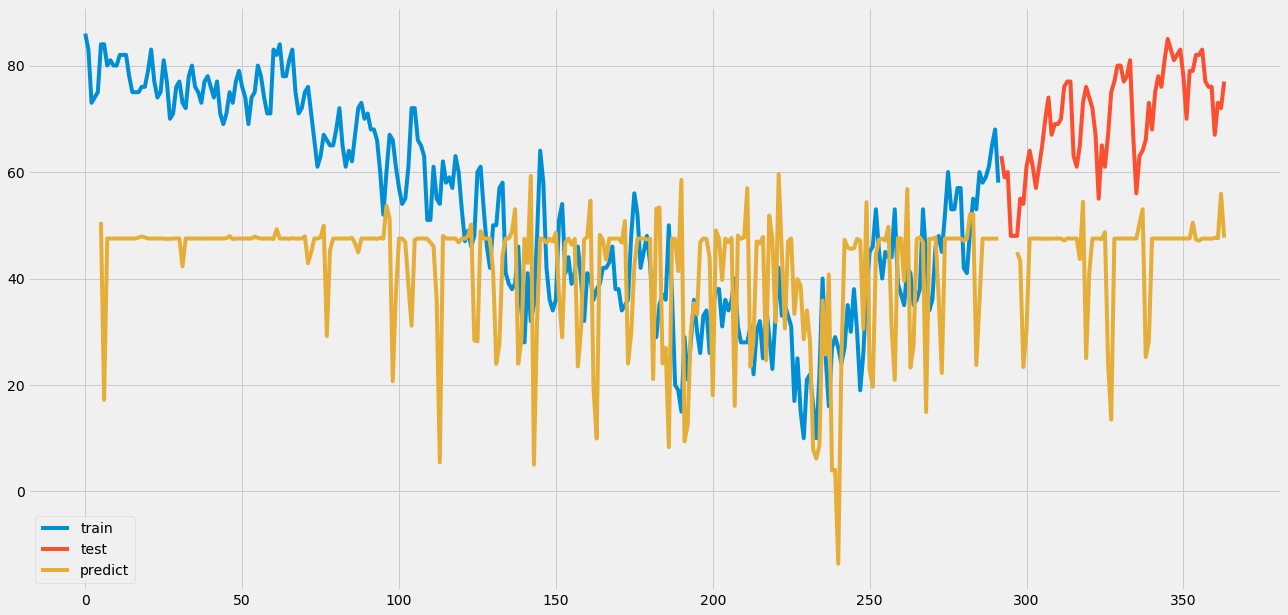

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.2622 - val_loss: 0.2623
Epoch 2/10
 - 0s - loss: 0.2354 - val_loss: 0.2656
Epoch 3/10
 - 0s - loss: 0.2396 - val_loss: 0.4750
Epoch 4/10
 - 0s - loss: 0.2375 - val_loss: 0.1788
Epoch 5/10
 - 0s - loss: 0.2384 - val_loss: 0.4238
Epoch 6/10
 - 0s - loss: 0.2404 - val_loss: 0.2552
Epoch 7/10
 - 0s - loss: 0.2399 - val_loss: 0.4422
Epoch 8/10
 - 0s - loss: 0.2434 - val_loss: 0.2340
Epoch 9/10
 - 0s - loss: 0.2355 - val_loss: 0.3063
Epoch 10/10
 - 0s - loss: 0.2400 - val_loss: 0.2828


'Train Error: 16.4518366824  Num NaN: 5'

'Test Error: 21.2090214402    Num NaN: 5'

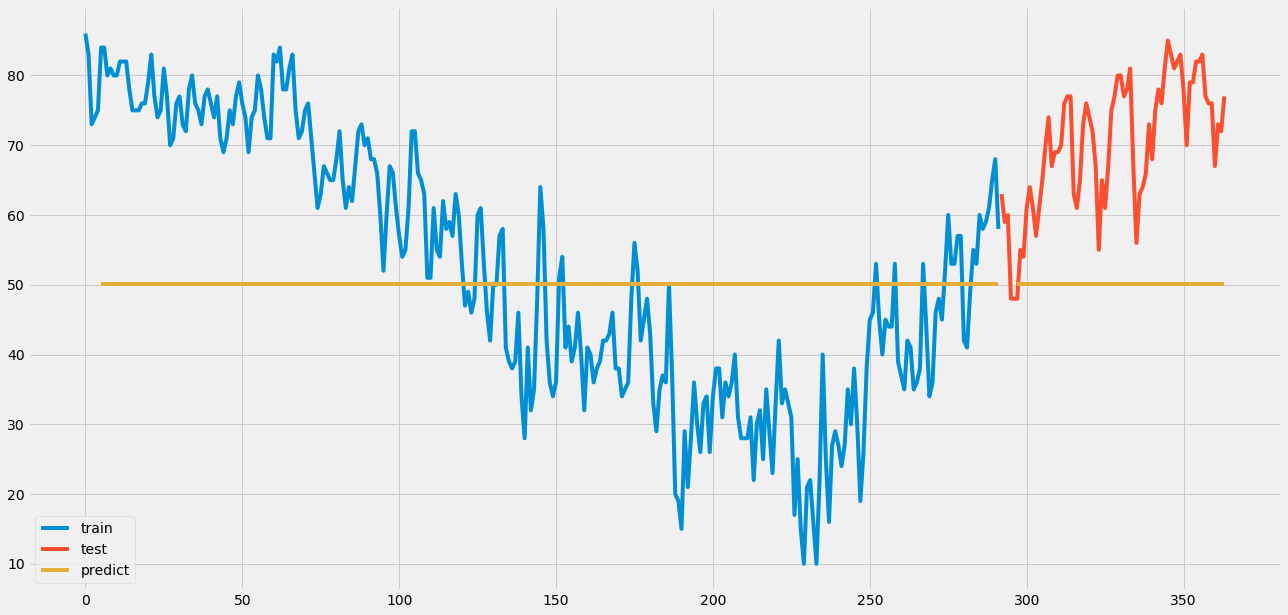

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

Train on 59 samples, validate on 15 samples
Epoch 1/10
 - 1s - loss: 1.1729 - val_loss: 0.9140
Epoch 2/10
 - 0s - loss: 0.8636 - val_loss: 0.7887
Epoch 3/10
 - 0s - loss: 0.7719 - val_loss: 0.7241
Epoch 4/10
 - 0s - loss: 0.6985 - val_loss: 0.6600
Epoch 5/10
 - 0s - loss: 0.6231 - val_loss: 0.5802
Epoch 6/10
 - 0s - loss: 0.5464 - val_loss: 0.5093
Epoch 7/10
 - 0s - loss: 0.4772 - val_loss: 0.4444
Epoch 8/10
 - 0s - loss: 0.4111 - val_loss: 0.3807
Epoch 9/10
 - 0s - loss: 0.3455 - val_loss: 0.3201
Epoch 10/10
 - 0s - loss: 0.2847 - val_loss: 0.2693


'Train Error: 2548.00822135  Num NaN: 0'

'Test Error: 2713.83542379    Num NaN: 0'

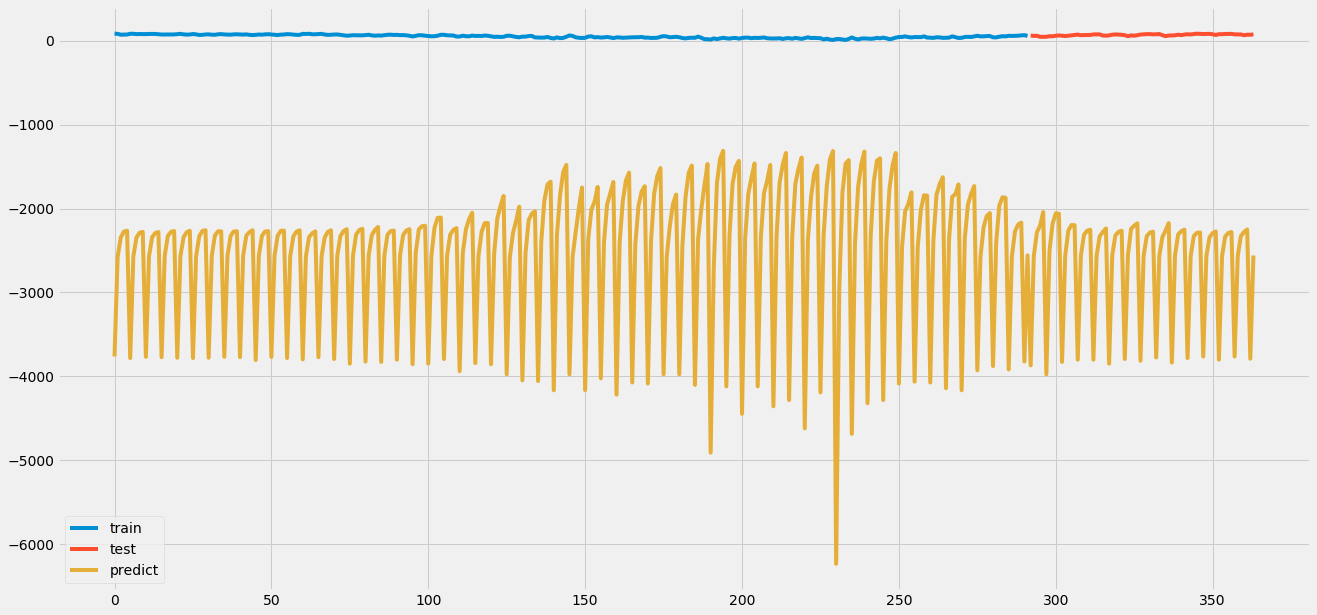

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model, name='RNNMultiple')

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Train on 1 samples, validate on 1 samples
Epoch 1/10
 - 2s - loss: 1.2980 - val_loss: 1.1081
Epoch 2/10
 - 1s - loss: 1.1171 - val_loss: 1.0147
Epoch 3/10
 - 1s - loss: 0.9638 - val_loss: 0.8797
Epoch 4/10
 - 1s - loss: 0.7942 - val_loss: 0.7394
Epoch 5/10
 - 1s - loss: 0.6545 - val_loss: 0.6295
Epoch 6/10
 - 1s - loss: 0.5555 - val_loss: 0.5464
Epoch 7/10
 - 1s - loss: 0.4729 - val_loss: 0.4806
Epoch 8/10
 - 1s - loss: 0.3976 - val_loss: 0.4299
Epoch 9/10
 - 1s - loss: 0.3407 - val_loss: 0.3877
Epoch 10/10
 - 1s - loss: 0.2973 - val_loss: 0.3512


'Train Error: 2637.92467802  Num NaN: 0'

'Test Error: 3541.68803236    Num NaN: 0'

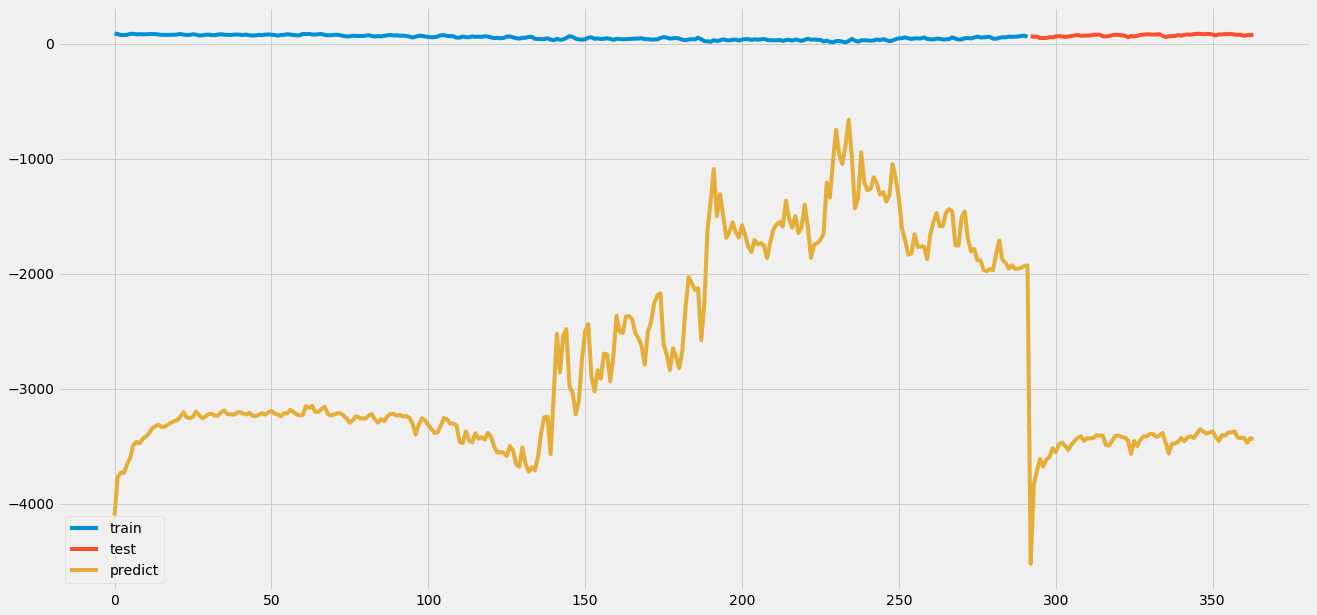

In [14]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model, name='RNNAll')